# Titanic Dataset - Data Cleaning and EDA
This notebook performs data cleaning and exploratory data analysis (EDA) on the Titanic dataset.

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Upload the Titanic Dataset (or use seaborn's built-in dataset)

In [4]:
# Option 1: Load built-in dataset
df = sns.load_dataset('titanic')

# Option 2: Upload manually if you have train.csv
# from google.colab import files
# uploaded = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

## View the Dataset

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.shape

(891, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

In [9]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [10]:
df.drop(columns=['deck'], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

<ipython-input-10-4005479729>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-10-4005479729>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

## Exploratory Data Analysis (EDA)

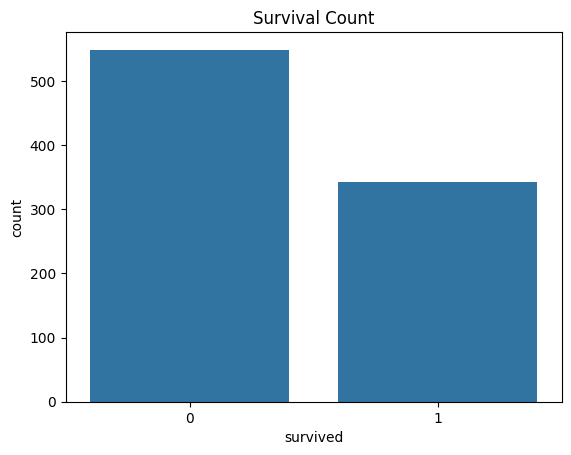

In [11]:
# Survival count
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()

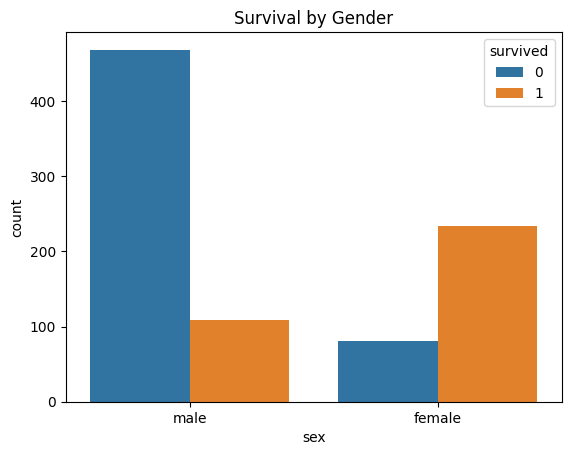

In [12]:
# Survival by gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()

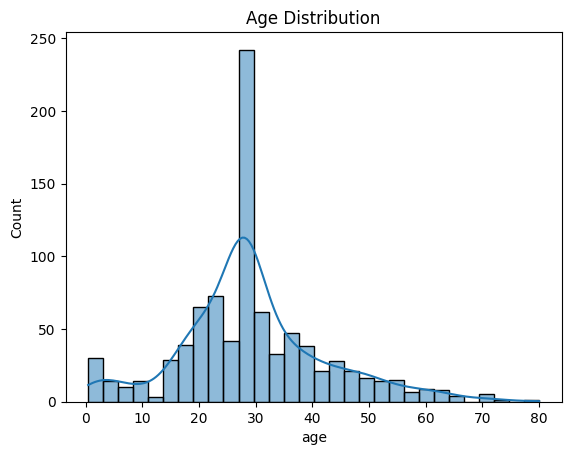

In [13]:
# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

In [14]:
# Heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

ValueError: could not convert string to float: 'male'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Survival by passenger class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

## Save the Cleaned Dataset

In [15]:
df.to_csv('cleaned_titanic.csv', index=False)

# Download the file (if using Google Colab)
# from google.colab import files
# files.download('cleaned_titanic.csv')

In [16]:
df = sns.load_dataset('titanic')


In [17]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df.drop(columns=['deck'], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


<ipython-input-18-3676880506>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-18-3676880506>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

<Axes: xlabel='survived', ylabel='count'>

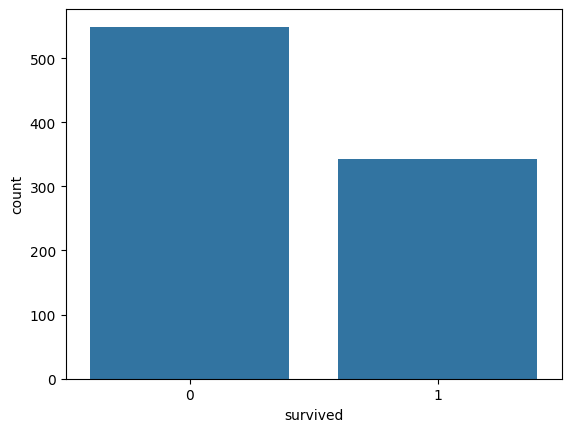

In [19]:
sns.countplot(x='survived', data=df)


<Axes: xlabel='sex', ylabel='count'>

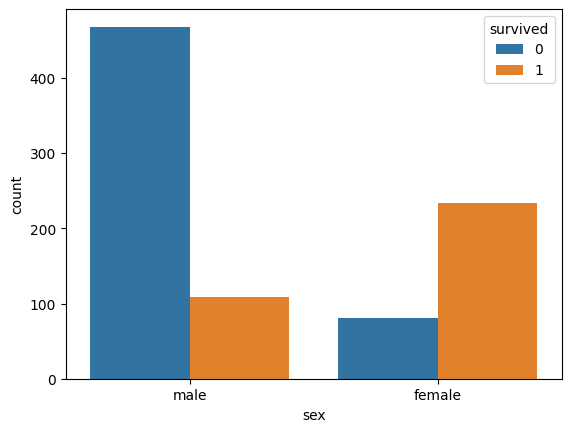

In [20]:
sns.countplot(x='sex', hue='survived', data=df)


<Axes: xlabel='age', ylabel='Count'>

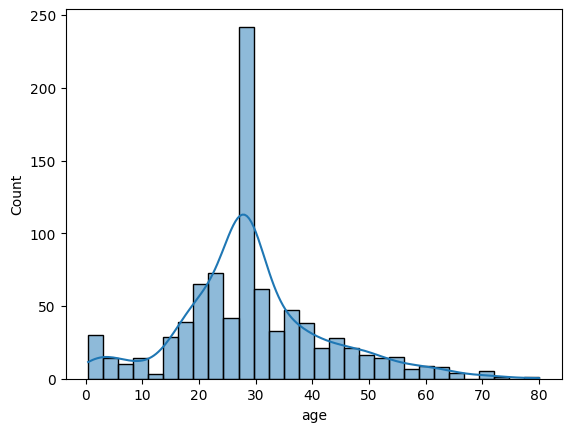

In [21]:
sns.histplot(df['age'], kde=True)


<Axes: xlabel='age', ylabel='Count'>

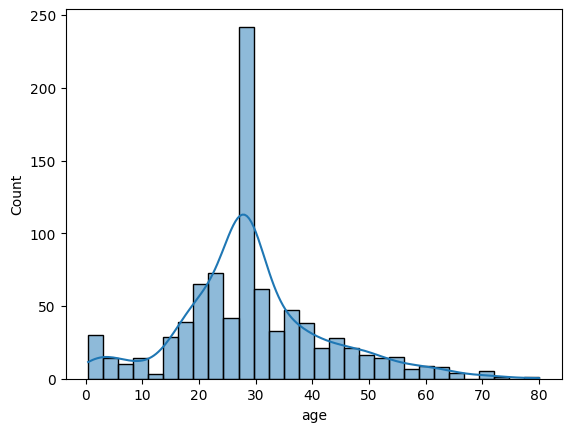

In [22]:
sns.histplot(df['age'], kde=True)


<Axes: xlabel='pclass', ylabel='count'>

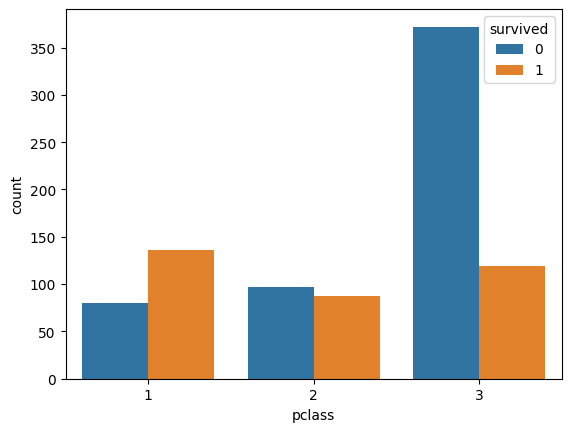

In [23]:
sns.countplot(x='pclass', hue='survived', data=df)


In [25]:
df.to_csv('cleaned_titanic.csv', index=False)


## 📌 1. Introduction
The Titanic dataset is one of the most famous datasets used for data science practice. It contains information about passengers aboard the RMS Titanic and whether they survived or not. In this task, we perform data cleaning and exploratory data analysis (EDA) to discover useful patterns.

## 🧹 2. Data Cleaning
Before analyzing the data, we first cleaned it:

Dropped the deck column, as it had many missing values.

Filled missing values:

age: Replaced missing values with the median age.

embarked: Replaced missing values with the most common port.

Ensured all other columns were free of missing or null values.

This made the dataset consistent and ready for analysis.

## 📊 3. Exploratory Data Analysis (EDA)
We used charts and graphs to find meaningful patterns:

✅ a. Survival Count
Showed the number of people who survived vs. those who didn’t.

✅ b. Survival by Gender
More women survived compared to men.

✅ c. Survival by Passenger Class
First-class passengers had a much higher chance of survival than third-class.

✅ d. Age Distribution
Most passengers were between 20 to 40 years old.



fare also had some impact on survival (higher fare = more likely first-class).

## 🧠 4. Key Insights
Females had higher survival rates.

First-class passengers were more likely to survive.

Passengers from lower classes had the lowest survival rate.

Age did not significantly affect survival.

## 📁 5. Conclusion
This task gave us hands-on experience with:

Cleaning real-world messy data

Using pandas and seaborn for analysis

Drawing insights using graphs

EDA is a crucial step in understanding the data before building any machine learning models.